<a href="https://colab.research.google.com/github/youngjae8061/AI_Study/blob/main/3_2_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EB%A1%9C%EB%A7%8C%EB%93%9C%EB%8A%94%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network 만들기 실습편

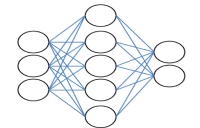

In [ ]:
# PyTorch 필요 라이브러리 호출
import torch                    # 이렇게했을때 안될 경우 cmd 창에서  >>> pip install pytorch라고 치면 됨
import torch.nn as nn           # nn -  neural network 인공신경망을 구성해주는 메서드 집합집합
import torch.nn.functional as F # 활성화함수들 호출
import torch.optim as optim     # 최적화 메서드 호출


In [ ]:
# Neural network 모델 생성
# 입력 --> 은닉 (3,5)
# 은닉 --> 출력 (5,2)
class fir_model(nn.Module): # nn.Module을 상속받는다.
  def __init__(self):
    super(fir_model, self).__init__()
    # 가중치행렬 1 설정    <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  이 모델의 파라미터
    self.lin1 = nn.Linear(3,5) # 3 by 5 크기의 메트릭스를 만들어라
    # 가중치행렬 2 설정    <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  이 모델의 파라미터
    self.lin2 = nn.Linear(5,2)        

    # forward propagation
    def forward(self, x):
      x = self.lin1(x)    # 입력 신호를 넣어주고 그 결과를 x로 치환   3x5행렬 통과
      x = F.relu(x)       # relu 활성화 함수 통과
      x = self.lin2(x)
      x = F.sigmoid(x)
      # 반환하는 x는 y햇
      return x

In [ ]:
# Neural network 모델 정의 및 최적화 툴(optimizer 사용예시)
model = fir_model()
opt = optim.SGD(model.parameters(), lr=0.01)   # Adam, RMSprop --> SGD(발전됨)   이 최적화 툴은 lr = 학습률이고 최적화할 파라미터는 fir_model()에 있는 파라미터다.


In [ ]:
print(model)

In [ ]:
import numpy as np

In [ ]:
# Backward propagation
# 최적화 단계 이 셀은 올바르게 실행되지 않아요! x,y는 실제론 없지만 있다고 가정하고 코딩했기 때문
criterion = nn.MSELoss() # criterion 변수는 MSELoss를 쓴다. MSELoss = (y햇 - y)**2

# torch에서는 torch에 대한 tensor로 바꿔줘야함.
# 이 과정을 하지않으면 torch가 제대로 실행되지 않음.
#x = torch.Tensor(x) # 입력 데이터 (3차원 벡터)
x = torch.Tensor(np.random.normal(size=(3)))
#y = torch.Tensor(y) # 출력 데이터 (2차원 벡터)
y = torch.Tensor(np.random.normal(size=(2)))

opt.zero_grad() # optimizer안에 모든 gradient를 0으로 초기화 (쓰레기값 방지)
y_infer = model(x) # forward propagation     출력값 찍어보기 뉴럴네트워크를 이용한 추론값 
loss = criterion(y_infer, y) # loss 함수 적용 criterion은 y_infer와 y를 상속받는데 이 둘을 MSELoss를 통해 거리를 구한다. criterion을 직접 만들수도 있음
loss.backward()
opt.step()